In [2]:
from datetime import datetime, timedelta

In [3]:
def daterange(start_date, end_date):
    delta = timedelta(hours=1)
    while start_date < end_date:
        yield start_date
        start_date += delta

In [9]:
start_date = datetime(2013, 1, 1, 00, 00)
end_date = datetime(2016, 1, 1, 00, 00)
time = []
for single_date in daterange(start_date, end_date):
   time.append(single_date.strftime("%Y-%m-%d %H:%M"))
time = pd.to_datetime(time)
len(time)

26280

In [11]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib as mpl

my_dateparser = lambda x: pd.datetime.strptime(x, "%Y %m %d %H %M")

path = 'shared-ns1000k/inputs/Aerosol_sizedist_obs/' 
all_files = glob.glob(path + "/Tiksi_201*_hourly.csv")


myorder = [2, 0, 1]
mylist = [all_files[i] for i in myorder]
  
li = []

for filename in mylist:
    df = pd.read_csv(filename)
    li.append(df)


df = pd.concat(li, axis=0, ignore_index=True)


df.replace(-999, np.nan, inplace=True)
df.drop(labels=['0','0.1','0.2','0.3','0.4','0.5','0.6'], axis=1, inplace=True)
df['Time'] = time
df = df.set_index('Time')
df

,20,22.44,25.179,28.251,31.698,35.566,39.905,44.774,50.238,56.368,...,178.25,200,224.4,251.79,282.51,316.98,355.66,399.05,447.74,502.38
Time,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
diam = df.columns
diam = ([float(ii) for ii in diam])
time = df.index
data = xr.DataArray(df.values,dims={'Time':time, 'Diameter':diam})
datas = xr.Dataset({'SizeDist':data})
datas['Time']=time
datas['Diameter']=diam

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


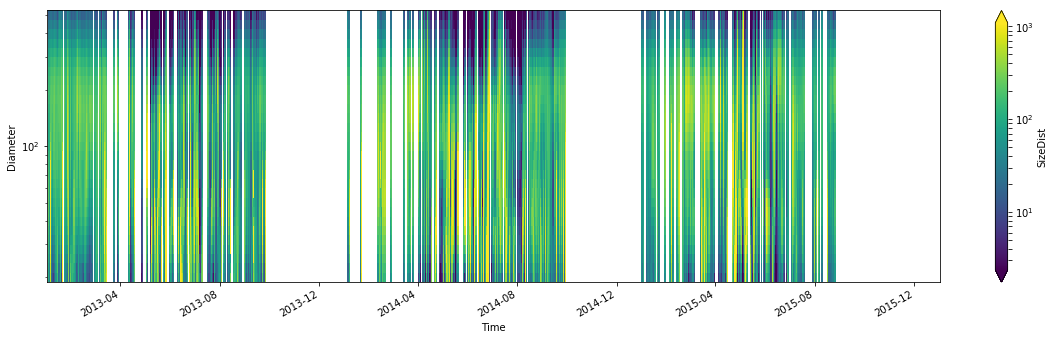

In [13]:
plt.figure(figsize=(20,5))
datas['SizeDist'].plot(x='Time', robust=True, yscale='log', norm=mpl.colors.LogNorm())

In [14]:
df_weekly = df.resample('w').mean()

In [15]:
diam = df_weekly.columns
diam = ([float(ii) for ii in diam])
time = df_weekly.index
data_w = xr.DataArray(df_weekly.values,dims={'Time':time, 'Diameter':diam})
datas_w = xr.Dataset({'SizeDist':data_w})
datas_w['Time']=time
datas_w['Diameter']=diam

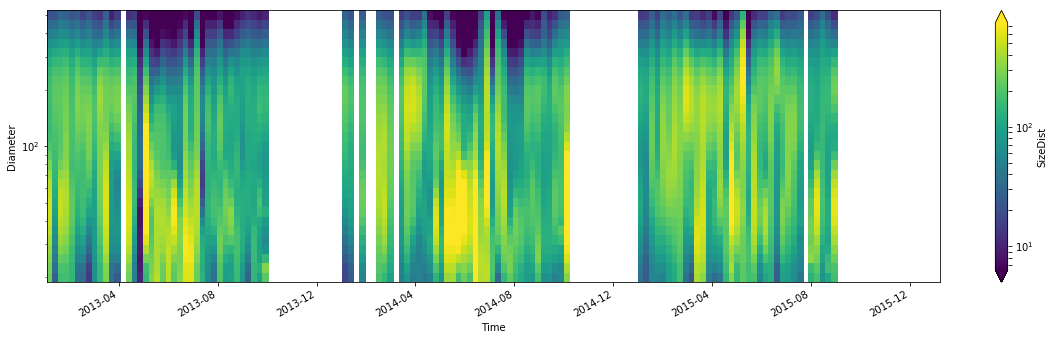

In [16]:
plt.figure(figsize=(20,5))
datas_w['SizeDist'].plot(x='Time', robust=True, yscale='log', norm=mpl.colors.LogNorm())